In [1]:
from mynotebooks import *
%matplotlib inline

exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,2),obj_type="box",salientMode="center", name="human") # minimum
learn = RobotLearning.LearningModel(exp)
nao,obj = exp.nao, exp.obj


-------------------------------------------------
Created Exp Setup  human Debug:  False
Created Learning Model bDebug False
Loading RobotLearning Models:  5 folder human strid 
load data/human/salient/map0.npy
load data/human/salient/map1.npy
load data/human/salient/map2.npy
load data/human/salient/map3.npy
load data/human/salient/map4.npy
load data/human/salient/map5.npy
load data/human/salient/map6.npy


In [6]:
exp.start()
learn.SM.folder='twoarmsobj'
learn.SM.load()


load data/twoarmsobj/salient/map0.npy
load data/twoarmsobj/salient/map1.npy
load data/twoarmsobj/salient/map2.npy
load data/twoarmsobj/salient/map3.npy
load data/twoarmsobj/salient/map4.npy
load data/twoarmsobj/salient/map5.npy
load data/twoarmsobj/salient/map6.npy


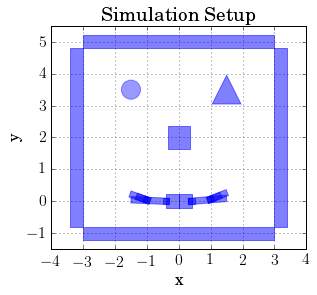

In [2]:
learn.myWorldLoop(45)                   
# Plotting
plt.close()
fig, ax = VectorFigUtils.makeFigure()
Box2DWorld.plotWorld(ax,nao,obj)
VectorFigUtils.decorate("x","y","Simulation Setup",mainfont=16)
plt.show()
fig.savefig('imgs/setup.png', dpi=300, format='png')

In [9]:
s4,s2 = learn.getSalient(4), learn.getSalient(2)
tin,tout = s4.getInOut(exp,s2)
print tin, tout
t = tout[2:4]+[-0.2,0]+tout[2:4]
s4.models[2].infer([4,5,6,7,8,9],[0,1,2,3],t)

[0.79, 2.06, -0.22, 0.06, -0.01, 2.0] [0.0, 0.0, -0.01, 2.0]


array([ 0.3 ,  1.8 , -0.14, -0.02])

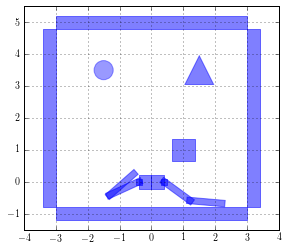

In [12]:
exp.start()
exp.setObjPos([1,1])

plt.close()
fig, ax = VectorFigUtils.makeFigure()
nao.gotoTargetJoints([2,-3.1])
Box2DWorld.plotWorld(ax,nao)
plt.show()

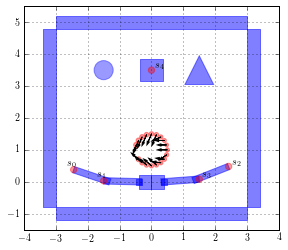

In [7]:
import AffordanceGradients as AG
from VectorFigUtils import drawCircle
exp.start()
exp.setObjPos([0,3.5])

plt.close()
fig, ax = VectorFigUtils.makeFigure()
Box2DWorld.plotWorld(ax,nao,obj)
Box2DWorld.plotVectors(ax, exp.getSalient())
#AG.plotAG(ax,exp,learn.SM.salientMap)
salientMap = learn.SM.salientMap
s4,s2,s0 = salientMap[4], salientMap[2], salientMap[0]


#pobj = np.array(exp.getObjPos())

pobj = np.array([0,1])
v = [1,0]
a, da = 0, 2*np.pi / 20.0
while(a < 2*np.pi):
    va = np.array(VectorFigUtils.vrotate(v,a))
    #p,pf = pobj + 0.7*va, pobj + 0.7*va
    p,pf = pobj + 0.5*va, pobj + 0.5*va
    
    #pin = pobj + 0.2*va
    pin = pobj + [0,0.2]
    vin = -0.8*va
    #vin = [0,0.11]
    tin = np.hstack((pin,vin,pobj))
    imodel = 2
    fv = s4.models[imodel].forward_prediction(tin)
    d = ExplautoUtils.distFwdNN(s4.models[imodel],tin)
    vel = 2*np.array(fv[0:2])
    #print s4.models[2].infer([4,5,6,7,8,9],[0,1,2,3],t)
    if(d<0.85):
        drawCircle(ax,p,.1*d,color='r')  
        ax.arrow(pf[0], pf[1], vel[0], vel[1], head_width=0.07, head_length=0.11, fc='k', ec='k')
    a += da
    
plt.show()
fig.savefig('imgs/ag.png', dpi=300, format='png')

In [2]:
import AffordanceGradients as AG
from VectorFigUtils import drawCircle
exp.start()
exp.setObjPos([0,3.5])

plt.close()
fig, ax = VectorFigUtils.makeFigure()
Box2DWorld.plotWorld(ax,nao,obj)
Box2DWorld.plotVectors(ax, exp.getSalient())
#AG.plotAG(ax,exp,learn.SM.salientMap)
salientMap = learn.SM.salientMap
s4,s2,s0 = salientMap[4], salientMap[2], salientMap[0]
AG.plotAG(ax,exp,s4,3,[0,.8])
#AG.plotAG(ax,exp,s4,2,[-1.2,1.2])
#AG.plotAG(ax,exp,s4,2,[0,2])
plt.show()

ExplautoBootstrapError: 